In [1]:
import sys

import numpy as np
import pandas as pd
import datetime as dt

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/mask-use/mask-use-by-county.csv'

maskcomp = pd.read_csv(url,index_col=0)
maskmandate = pd.read_csv('U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv')
cases = pd.read_csv('RAW_us_confirmed_cases.csv')

In [3]:
maskcomp.head()

,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
COUNTYFP,,,,,
1001,0.053,0.074,0.134,0.295,0.444
1003,0.083,0.059,0.098,0.323,0.436
1005,0.067,0.121,0.120,0.201,0.491
1007,0.020,0.034,0.096,0.278,0.572
1009,0.053,0.114,0.180,0.194,0.459


In [4]:
maskmandate.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,4/14/2020,2,NaN,NaN,NaN,NaN


In [5]:
cases.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,10043,10047,10048,10061,10083,10219,10228,10239,10252,10258
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,37245,37258,37266,37285,37325,37350,37372,37398,37414,37425
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,3577,3578,3578,3583,3595,3596,3596,3599,3601,3601
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,4251,4252,4253,4256,4262,4275,4276,4278,4279,4281
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,10192,10197,10207,10227,10338,10364,10371,10395,10406,10408


In [6]:
SDcases = cases.loc[cases['Admin2'] == 'San Diego']
SDcases.FIPS = SDcases.FIPS.astype(int)
print(SDcases.head())

SDmandate = maskmandate.loc[maskmandate['County_Name'] == 'San Diego County']
SDmandate.reset_index(inplace = True)
print(SDmandate.head())

SDmaskcomp = maskcomp.loc[6073]
print(SDmaskcomp.head())

    Province_State     Admin2       UID iso2 iso3  code3  FIPS Country_Region  \
234     California  San Diego  84006073   US  USA    840  6073             US   

           Lat       Long_  ... 10/23/21  10/24/21  10/25/21  10/26/21  \
234  33.034846 -116.736533  ...   387483    387498    389839    390506   

     10/27/21  10/28/21  10/29/21  10/30/21  10/31/21  11/1/21  
234    391042    391469    391471    391471    391471   393068  

[1 rows x 661 columns]
   index State_Tribe_Territory       County_Name  FIPS_State  FIPS_County  \
0  58874                    CA  San Diego County           6           73   
1  58904                    CA  San Diego County           6           73   
2  58934                    CA  San Diego County           6           73   
3  58964                    CA  San Diego County           6           73   
4  58994                    CA  San Diego County           6           73   

        date  order_code Face_Masks_Required_in_Public Source_of_Action

C:\Users\amsuc\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [87]:
SDmaskcomp.head()

NEVER         0.017
RARELY        0.023
SOMETIMES     0.034
FREQUENTLY    0.126
ALWAYS        0.800
Name: 6073, dtype: float64

In [7]:
SDcases = SDcases.melt(id_vars=["Province_State", "Admin2", "UID", "iso2", "iso3", "code3", "FIPS", 'Country_Region', 'Lat', "Long_", 'Combined_Key'], 
        var_name="Date", 
        value_name="Cases")

In [8]:
SDcases.drop(columns = ['UID', 'iso2', 'iso3', 'code3', 'Lat', 'Long_', 'Combined_Key'], inplace = True)
SDcases.head()

,Province_State,Admin2,FIPS,Country_Region,Date,Cases
0,California,San Diego,6073,US,1/22/20,0
1,California,San Diego,6073,US,1/23/20,0
2,California,San Diego,6073,US,1/24/20,0
3,California,San Diego,6073,US,1/25/20,0
4,California,San Diego,6073,US,1/26/20,0


In [9]:
mandateBegan = SDmandate.loc[SDmandate['order_code'] == 1]

mandateBegan.head()
mandateBegan.tail()

,index,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
488,910594,CA,San Diego County,6,73,8/11/2021,1,Yes,Official,https://www.cdph.ca.gov/Programs/CID/DCDC/Page...,"Cal. HD Guidance for Face Coverings (July 28, ..."
489,910595,CA,San Diego County,6,73,8/12/2021,1,Yes,Official,https://www.cdph.ca.gov/Programs/CID/DCDC/Page...,"Cal. HD Guidance for Face Coverings (July 28, ..."
490,910596,CA,San Diego County,6,73,8/13/2021,1,Yes,Official,https://www.cdph.ca.gov/Programs/CID/DCDC/Page...,"Cal. HD Guidance for Face Coverings (July 28, ..."
491,910597,CA,San Diego County,6,73,8/14/2021,1,Yes,Official,https://www.cdph.ca.gov/Programs/CID/DCDC/Page...,"Cal. HD Guidance for Face Coverings (July 28, ..."
492,910598,CA,San Diego County,6,73,8/15/2021,1,Yes,Official,https://www.cdph.ca.gov/Programs/CID/DCDC/Page...,"Cal. HD Guidance for Face Coverings (July 28, ..."


In [10]:
mandateEnd = SDmandate.loc[SDmandate['order_code'] == 2]

mandateEnd.head()
mandateEnd.tail()

,index,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
64,59116,CA,San Diego County,6,73,6/13/2020,2,NaN,NaN,NaN,NaN
65,59117,CA,San Diego County,6,73,6/14/2020,2,NaN,NaN,NaN,NaN
66,59118,CA,San Diego County,6,73,6/15/2020,2,NaN,NaN,NaN,NaN
67,59119,CA,San Diego County,6,73,6/16/2020,2,NaN,NaN,NaN,NaN
68,59120,CA,San Diego County,6,73,6/17/2020,2,NaN,NaN,NaN,NaN


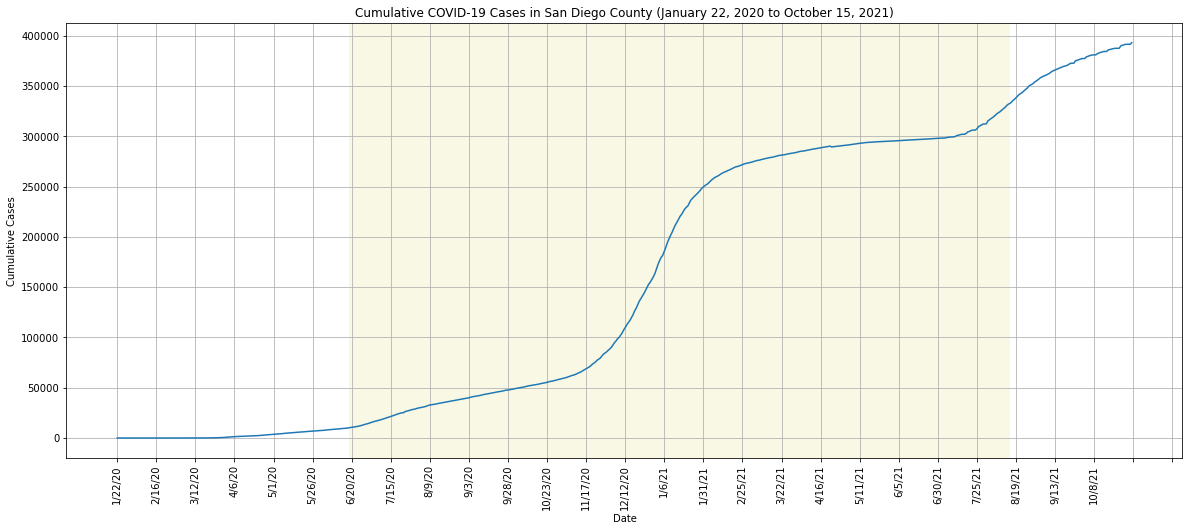

In [84]:
# Create a plot
plt.figure(figsize=(20, 8))

# Plotting the Cases
plt.plot(SDcases.Date, SDcases.Cases)

# Shaded area is when mask mandate began
plt.axvspan('6/18/20', '8/15/21', color='y', alpha=0.1, lw=0)

# Formatting the time series graph
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")

ticks = range(0, 700, 25)
plt.xticks(ticks)
plt.xticks(rotation=90)

plt.title("Cumulative COVID-19 Cases in San Diego County (January 22, 2020 to October 15, 2021)")
plt.grid()

In [12]:
dailycases = SDcases.copy()
dailycases['Daily_Cases'] = (
    dailycases.groupby(['Admin2'])['Cases']
    .transform(lambda s: s.sub(s.shift().fillna(0)).abs())
)

In [13]:
dailycases

,Province_State,Admin2,FIPS,Country_Region,Date,Cases,Daily_Cases
0,California,San Diego,6073,US,1/22/20,0,0
1,California,San Diego,6073,US,1/23/20,0,0
2,California,San Diego,6073,US,1/24/20,0,0
3,California,San Diego,6073,US,1/25/20,0,0
4,California,San Diego,6073,US,1/26/20,0,0
...,...,...,...,...,...,...,...
645,California,San Diego,6073,US,10/28/21,391469,427
646,California,San Diego,6073,US,10/29/21,391471,2
647,California,San Diego,6073,US,10/30/21,391471,0
648,California,San Diego,6073,US,10/31/21,391471,0


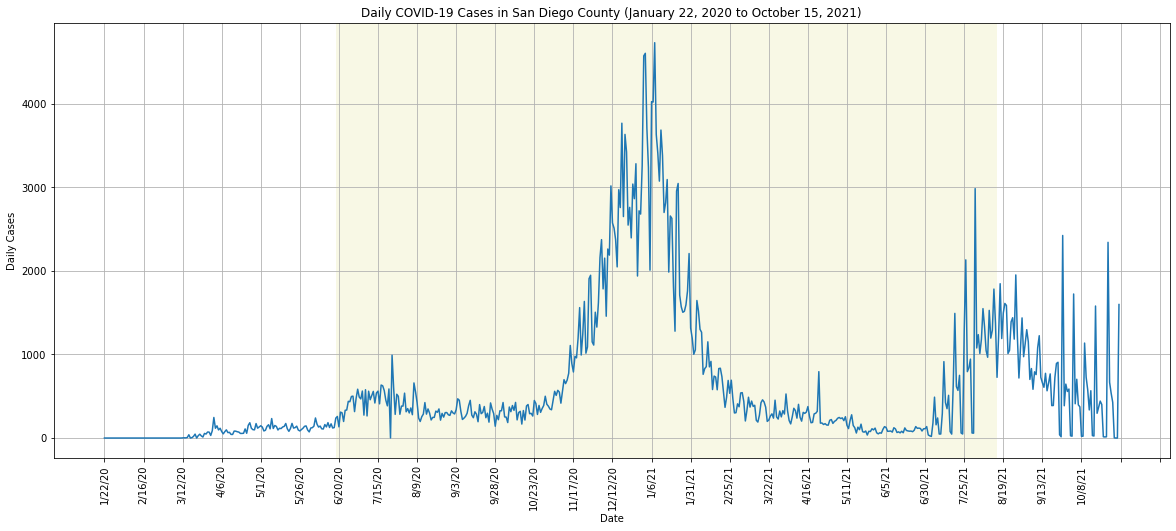

In [61]:
# Create a plot
plt.figure(figsize=(20, 8))

# Plotting the Cases
plt.plot(dailycases.Date, dailycases.Daily_Cases)

# Shaded area is when mask mandate began
plt.axvspan('6/18/20', '8/15/21', color='y', alpha=0.1, lw=0)

# Formatting the time series graph
plt.xlabel("Date")
plt.ylabel("Daily Cases")

ticks = range(0, 700, 25)
plt.xticks(ticks)
plt.xticks(rotation=90)

plt.title("Daily COVID-19 Cases in San Diego County (January 22, 2020 to October 15, 2021)")
plt.grid()

In [15]:
movingavg = dailycases.Daily_Cases.rolling(window=7).mean().round().fillna(0)
movingavg

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
645    573.0
646    572.0
647    570.0
648    568.0
649    461.0
Name: Daily_Cases, Length: 650, dtype: float64

In [16]:
dailycases['Moving_7_Day_Avg'] = movingavg

In [17]:
dailycases.tail()

,Province_State,Admin2,FIPS,Country_Region,Date,Cases,Daily_Cases,Moving_7_Day_Avg
645,California,San Diego,6073,US,10/28/21,391469,427,573.0
646,California,San Diego,6073,US,10/29/21,391471,2,572.0
647,California,San Diego,6073,US,10/30/21,391471,0,570.0
648,California,San Diego,6073,US,10/31/21,391471,0,568.0
649,California,San Diego,6073,US,11/1/21,393068,1597,461.0


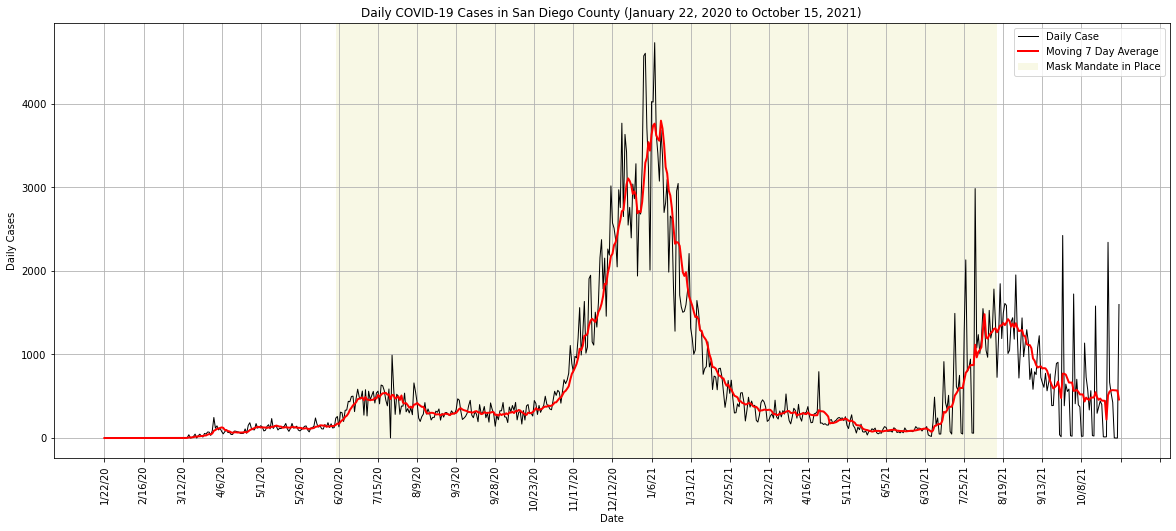

In [85]:
# Create a plot
plt.figure(figsize=(20, 8))

# Plotting the Cases
plt.plot(dailycases.Date, dailycases.Daily_Cases, color = 'black', linewidth = 1)

plt.plot(dailycases.Date, dailycases.Moving_7_Day_Avg, color = 'red', linewidth = 2)

# Shaded area is when mask mandate began
plt.axvspan('6/18/20', '8/15/21', color='y', alpha=0.1, lw=0)

# Create a legend for the different lines that will be displayed
plt.legend(['Daily Case', 'Moving 7 Day Average', 'Mask Mandate in Place'])

# Formatting the time series graph
plt.xlabel("Date")
plt.ylabel("Daily Cases")

ticks = range(0, 700, 25)
plt.xticks(ticks)
plt.xticks(rotation=90)

plt.title("Daily COVID-19 Cases in San Diego County (January 22, 2020 to October 15, 2021)")
plt.grid()

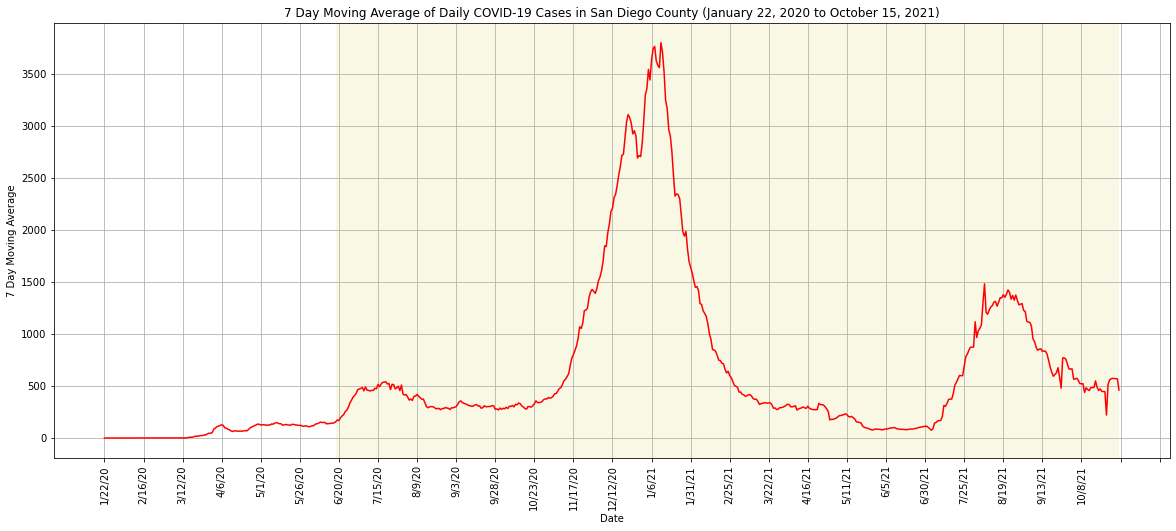

In [19]:
# Create a plot
plt.figure(figsize=(20, 8))

# Plotting the Moving Average
plt.plot(dailycases.Date, dailycases.Moving_7_Day_Avg, color = 'red')

# Shaded area is when mask mandate began
plt.axvspan('6/18/20', '11/1/21', color='y', alpha=0.1, lw=0)


# Formatting the time series graph
plt.xlabel("Date")
plt.ylabel("7 Day Moving Average")

ticks = range(0, 700, 25)
plt.xticks(ticks)
plt.xticks(rotation=90)

plt.title("7 Day Moving Average of Daily COVID-19 Cases in San Diego County (January 22, 2020 to October 15, 2021)")
plt.grid()

In [28]:
rates = dailycases.copy()

#population received from census, 3,298,634 people in San Diego County in 2020
# population in 2021: 3,347,270
# for now just using 2020's population as that was when last census was done
rates['Infection_Rate'] = rates.Cases / (3298634 - rates.Cases)

rates.tail()

,Province_State,Admin2,FIPS,Country_Region,Date,Cases,Daily_Cases,Moving_7_Day_Avg,Infection_Rate
645,California,San Diego,6073,US,10/28/21,391469,427,573.0,0.134657
646,California,San Diego,6073,US,10/29/21,391471,2,572.0,0.134657
647,California,San Diego,6073,US,10/30/21,391471,0,570.0,0.134657
648,California,San Diego,6073,US,10/31/21,391471,0,568.0,0.134657
649,California,San Diego,6073,US,11/1/21,393068,1597,461.0,0.135281


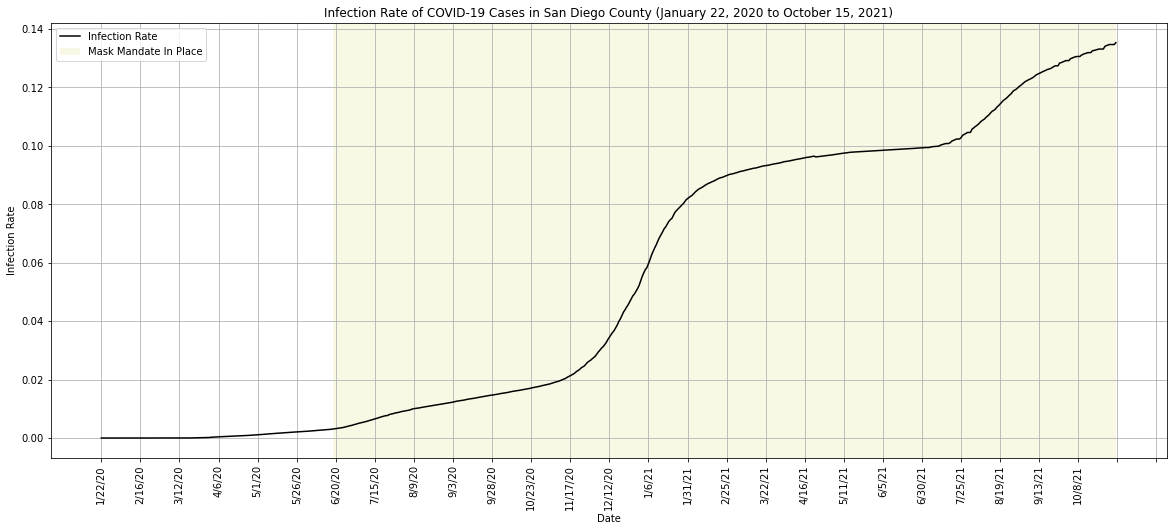

In [29]:
# Create a plot
plt.figure(figsize=(20, 8))

# Plotting the Moving Average
plt.plot(rates.Date, rates.Infection_Rate, color = 'black')

# Shaded area is when mask mandate began
plt.axvspan('6/18/20', '11/1/21', color='y', alpha=0.1, lw=0)

# Create a legend for the different lines that will be displayed
plt.legend(['Infection Rate', 'Mask Mandate In Place'])


# Formatting the time series graph
plt.xlabel("Date")
plt.ylabel("Infection Rate")

ticks = range(0, 700, 25)
plt.xticks(ticks)
plt.xticks(rotation=90)

plt.title("Infection Rate of COVID-19 Cases in San Diego County (January 22, 2020 to October 15, 2021)")
plt.grid()

In [31]:
dailyrate = rates.copy()

dailyrate['Daily_Rate'] = (
    dailyrate.groupby(['Admin2'])['Infection_Rate']
    .transform(lambda s: s.sub(s.shift().fillna(0)).abs())
)

dailyrate.tail()

,Province_State,Admin2,FIPS,Country_Region,Date,Cases,Daily_Cases,Moving_7_Day_Avg,Infection_Rate,Daily_Rate
645,California,San Diego,6073,US,10/28/21,391469,427,573.0,0.134657,1.666322e-04
646,California,San Diego,6073,US,10/29/21,391471,2,572.0,0.134657,7.805937e-07
647,California,San Diego,6073,US,10/30/21,391471,0,570.0,0.134657,0.000000e+00
648,California,San Diego,6073,US,10/31/21,391471,0,568.0,0.134657,0.000000e+00
649,California,San Diego,6073,US,11/1/21,393068,1597,461.0,0.135281,6.236471e-04


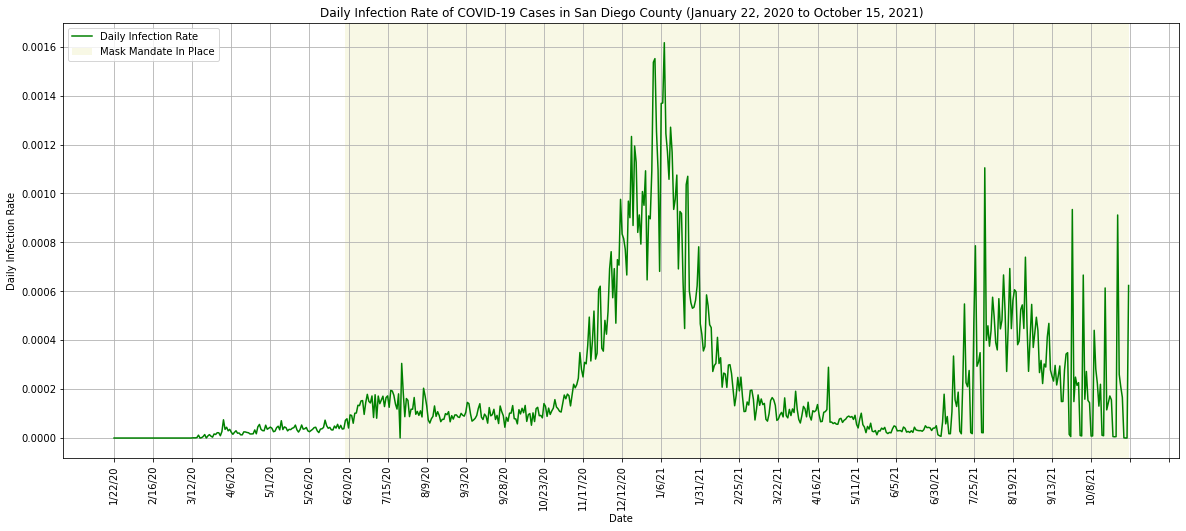

In [32]:
# Create a plot
plt.figure(figsize=(20, 8))

# Plotting the Moving Average
plt.plot(dailyrate.Date, dailyrate.Daily_Rate, color = 'green')

# Shaded area is when mask mandate began
plt.axvspan('6/18/20', '11/1/21', color='y', alpha=0.1, lw=0)

# Create a legend for the different lines that will be displayed
plt.legend(['Daily Infection Rate', 'Mask Mandate In Place'])


# Formatting the time series graph
plt.xlabel("Date")
plt.ylabel("Daily Infection Rate")

ticks = range(0, 700, 25)
plt.xticks(ticks)
plt.xticks(rotation=90)

plt.title("Daily Infection Rate of COVID-19 Cases in San Diego County (January 22, 2020 to October 15, 2021)")
plt.grid()

In [38]:
len(dailycases.Date)

650

In [56]:
# F(x + Vx) - f(x) / Vx, we know change in x will be 1, so vx = 1
listy = list()
i = 0
while i < (len(dailycases.Date)):
    if i > 0:
        drv = dailycases.Daily_Cases[i] - dailycases.Daily_Cases[i-1]
        listy.append(drv)
        i += 1
    else:
        drv = 0
        listy.append(drv)
        i += 1
listy

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 -1,
 1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 -1,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 -1,
 4,
 33,
 -39,
 5,
 15,
 27,
 -47,
 28,
 18,
 -21,
 -13,
 43,
 -7,
 24,
 -1,
 -40,
 57,
 158,
 -129,
 29,
 -49,
 20,
 -39,
 -28,
 26,
 22,
 -33,
 3,
 -25,
 0,
 40,
 -1,
 -7,
 -4,
 -16,
 0,
 2,
 52,
 -52,
 95,
 31,
 -66,
 -17,
 -2,
 75,
 -55,
 14,
 15,
 -16,
 -46,
 8,
 47,
 19,
 -49,
 123,
 -119,
 36,
 -11,
 -43,
 21,
 -4,
 19,
 7,
 35,
 -64,
 -30,
 34,
 61,
 -56,
 6,
 17,
 -46,
 -11,
 16,
 16,
 23,
 5,
 -49,
 -23,
 47,
 4,
 18,
 98,
 -75,
 -34,
 12,
 -33,
 -2,
 53,
 -28,
 51,
 -58,
 44,
 -50,
 5,
 113,
 20,
 -124,
 176,
 -8,
 -104,
 134,
 3,
 104,
 -5,
 63,
 4,
 -185,
 158,
 110,
 -94,
 -22,
 94,
 -288,
 304,
 -314,
 296,
 -102,
 51,
 49,
 -139,
 120,
 22,
 -152,
 225,
 -9,
 -57,
 -115,
 -68,
 202,
 -586,
 990,
 -388,
 -320,
 241,
 -25,
 -215,
 98,
 0,
 155,
 -223,
 38,
 -5

In [57]:
len(listy)

650

In [58]:
derivative = dailycases.copy()
derivative['Derivative'] = listy

derivative.tail()

,Province_State,Admin2,FIPS,Country_Region,Date,Cases,Daily_Cases,Moving_7_Day_Avg,Derivative
645,California,San Diego,6073,US,10/28/21,391469,427,573.0,-109
646,California,San Diego,6073,US,10/29/21,391471,2,572.0,-425
647,California,San Diego,6073,US,10/30/21,391471,0,570.0,-2
648,California,San Diego,6073,US,10/31/21,391471,0,568.0,0
649,California,San Diego,6073,US,11/1/21,393068,1597,461.0,1597


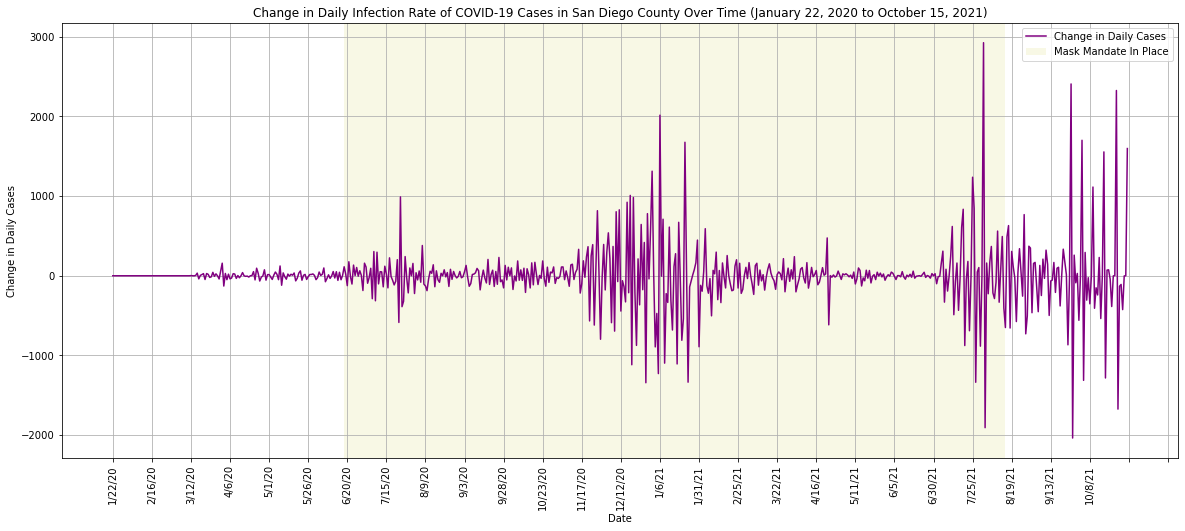

In [60]:
# Create a plot
plt.figure(figsize=(20, 8))

# Plotting the Moving Average
plt.plot(derivative.Date, derivative.Derivative, color = 'purple')

# Shaded area is when mask mandate began
plt.axvspan('6/18/20', '8/15/21', color='y', alpha=0.1, lw=0)

# Create a legend for the different lines that will be displayed
plt.legend(['Change in Daily Cases', 'Mask Mandate In Place'])


# Formatting the time series graph
plt.xlabel("Date")
plt.ylabel("Change in Daily Cases")

ticks = range(0, 700, 25)
plt.xticks(ticks)
plt.xticks(rotation=90)

plt.title("Change in Daily Infection Rate of COVID-19 Cases in San Diego County Over Time (January 22, 2020 to October 15, 2021)")
plt.grid()

In [62]:
movingavgdrv = derivative.Derivative.rolling(window=7).mean().round().fillna(0)
movingavgdrv

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
645      4.0
646     -2.0
647     -2.0
648     -2.0
649   -106.0
Name: Derivative, Length: 650, dtype: float64

In [64]:
derivative['Moving_7_Day_Avg_drv'] = movingavgdrv

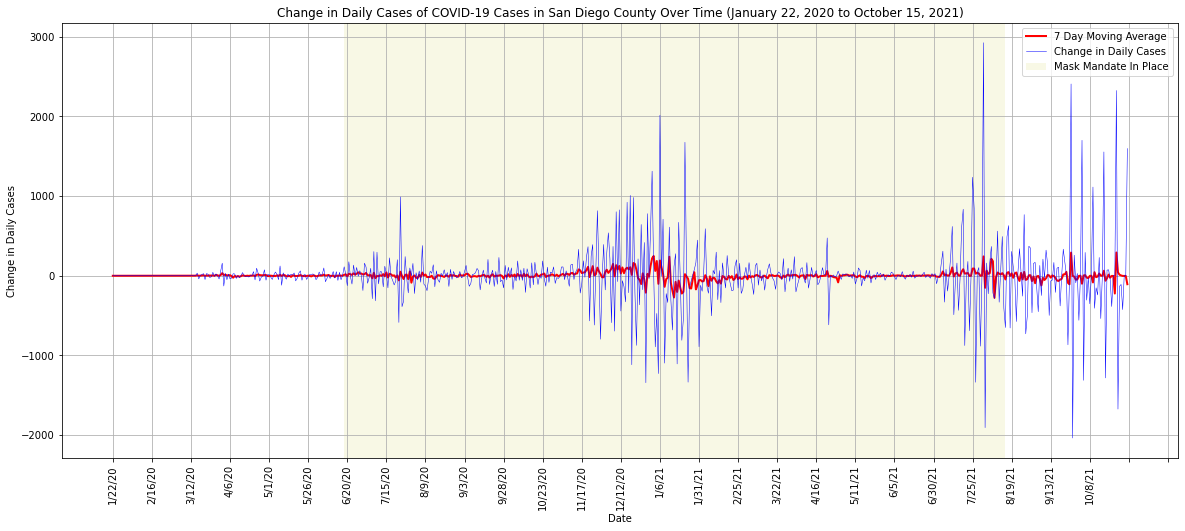

In [86]:
# Create a plot
plt.figure(figsize=(20, 8))

# Plotting the Moving Average
plt.plot(derivative.Date, derivative.Moving_7_Day_Avg_drv, color = 'red', linewidth = 2)
plt.plot(derivative.Date, derivative.Derivative, color = 'blue', linewidth = 0.5)

# Shaded area is when mask mandate began
plt.axvspan('6/18/20', '8/15/21', color='y', alpha=0.1, lw=0)

# Create a legend for the different lines that will be displayed
plt.legend(['7 Day Moving Average', 'Change in Daily Cases', 'Mask Mandate In Place'])


# Formatting the time series graph
plt.xlabel("Date")
plt.ylabel("Change in Daily Cases")

ticks = range(0, 700, 25)
plt.xticks(ticks)
plt.xticks(rotation=90)

plt.title("Change in Daily Cases of COVID-19 Cases in San Diego County Over Time (January 22, 2020 to October 15, 2021)")
plt.grid()

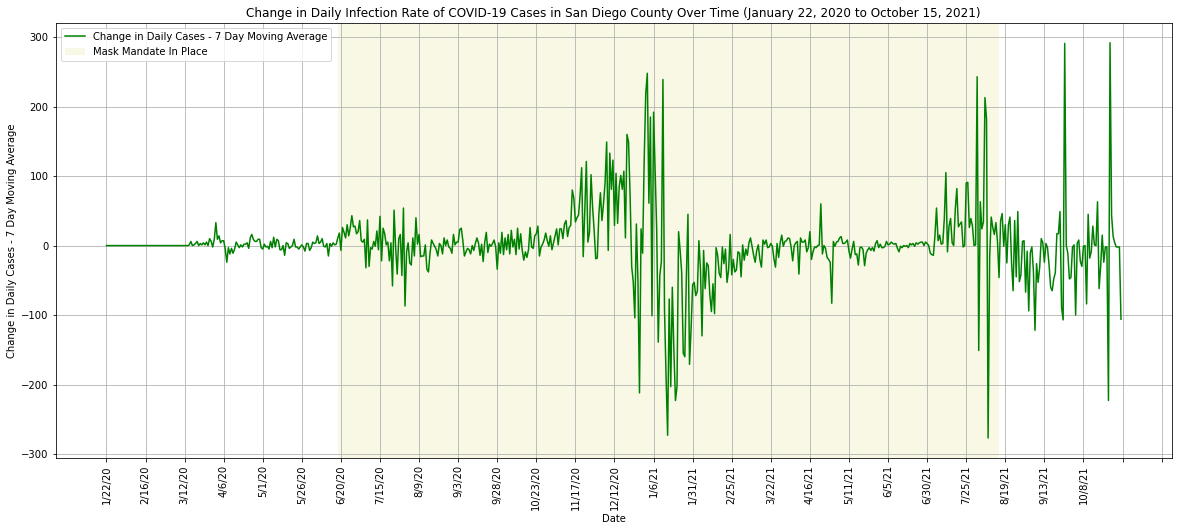

In [67]:
# Create a plot
plt.figure(figsize=(20, 8))

# Plotting the Moving Average
plt.plot(derivative.Date, derivative.Moving_7_Day_Avg_drv, color = 'green')

# Shaded area is when mask mandate began
plt.axvspan('6/18/20', '8/15/21', color='y', alpha=0.1, lw=0)

# Create a legend for the different lines that will be displayed
plt.legend(['Change in Daily Cases - 7 Day Moving Average', 'Mask Mandate In Place'])


# Formatting the time series graph
plt.xlabel("Date")
plt.ylabel("Change in Daily Cases - 7 Day Moving Average")

ticks = range(0, 700, 25)
plt.xticks(ticks)
plt.xticks(rotation=90)

plt.title("Change in Daily Infection Rate of COVID-19 Cases in San Diego County Over Time (January 22, 2020 to October 15, 2021)")
plt.grid()

In [88]:
# F(x + Vx) - f(x) / Vx, we know change in x will be 1, so vx = 1
listy2 = list()
i = 0
while i < (len(dailycases.Date)):
    if i > 0:
        drv2 = dailycases.Cases[i] - dailycases.Cases[i-1]
        listy2.append(drv2)
        i += 1
    else:
        drv2 = 0
        listy2.append(drv2)
        i += 1
listy2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 3,
 2,
 6,
 39,
 0,
 5,
 20,
 47,
 0,
 28,
 46,
 25,
 12,
 55,
 48,
 72,
 71,
 31,
 88,
 246,
 117,
 146,
 97,
 117,
 78,
 50,
 76,
 98,
 65,
 68,
 43,
 43,
 83,
 82,
 75,
 71,
 55,
 55,
 57,
 109,
 57,
 152,
 183,
 117,
 100,
 98,
 173,
 118,
 132,
 147,
 131,
 85,
 93,
 140,
 159,
 110,
 233,
 114,
 150,
 139,
 96,
 117,
 113,
 132,
 139,
 174,
 110,
 80,
 114,
 175,
 119,
 125,
 142,
 96,
 85,
 101,
 117,
 140,
 145,
 96,
 73,
 120,
 124,
 142,
 240,
 165,
 131,
 143,
 110,
 108,
 161,
 133,
 184,
 126,
 170,
 120,
 125,
 238,
 258,
 134,
 310,
 302,
 198,
 332,
 335,
 439,
 434,
 497,
 501,
 316,
 474,
 584,
 490,
 468,
 562,
 274,
 578,
 264,
 560,
 458,
 509,
 558,
 419,
 539,
 561,
 409,
 634,
 625,
 568,
 453,
 385,
 587,
 1,
 991,
 603,
 283,
 524,
 499,
 284,
 382,
 382,
 53

In [90]:
len(listy2)

650

In [92]:
derivative2 = dailycases.copy()
derivative2['Derivative2'] = listy2

derivative2.tail()

,Province_State,Admin2,FIPS,Country_Region,Date,Cases,Daily_Cases,Moving_7_Day_Avg,Derivative2
645,California,San Diego,6073,US,10/28/21,391469,427,573.0,427
646,California,San Diego,6073,US,10/29/21,391471,2,572.0,2
647,California,San Diego,6073,US,10/30/21,391471,0,570.0,0
648,California,San Diego,6073,US,10/31/21,391471,0,568.0,0
649,California,San Diego,6073,US,11/1/21,393068,1597,461.0,1597


In [98]:
SDcases1 = SDcases.copy()
SDcases1['Cases'] = SDcases1['Cases']/100

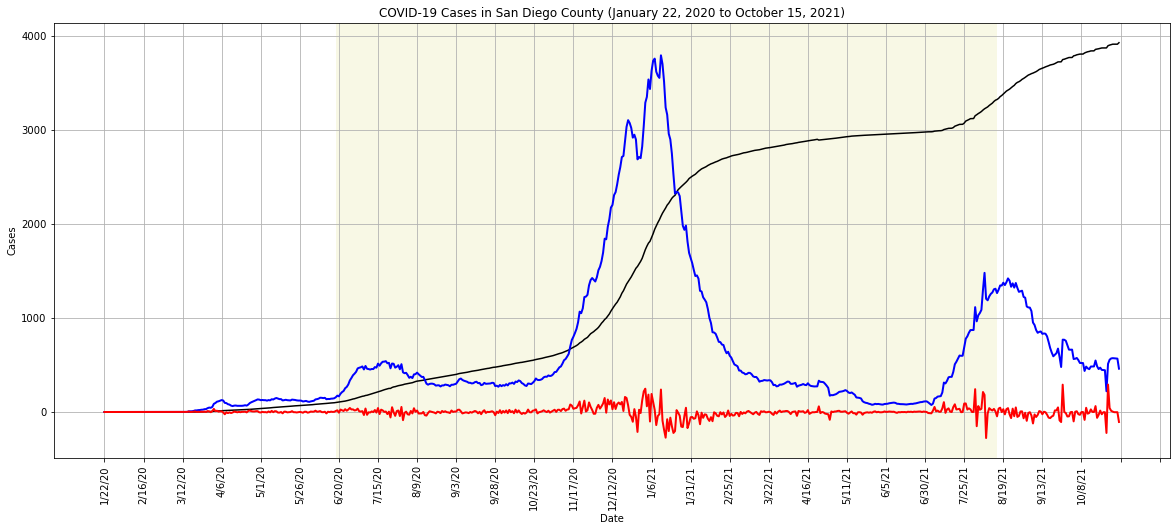

In [102]:
# Create a plot
plt.figure(figsize=(20, 8))

# Plotting the Cases
plt.plot(SDcases1.Date, SDcases1.Cases, color = 'black')

plt.plot(dailycases.Date, dailycases.Moving_7_Day_Avg, color = 'blue', linewidth = 2)

plt.plot(derivative.Date, derivative.Moving_7_Day_Avg_drv, color = 'red', linewidth = 2)


# Shaded area is when mask mandate began
plt.axvspan('6/18/20', '8/15/21', color='y', alpha=0.1, lw=0)

# Formatting the time series graph
plt.xlabel("Date")
plt.ylabel("Cases")

ticks = range(0, 700, 25)
plt.xticks(ticks)
plt.xticks(rotation=90)

plt.title("COVID-19 Cases in San Diego County (January 22, 2020 to October 15, 2021)")
plt.grid()